In [22]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader 
from data_loader import *
import torchvision
from unet_model import *

In [23]:
x_test_data= np.load('x_test.npy')
y_test_data= np.load('y_test.npy')

In [24]:
def accuracy(pred,train):
    with torch.no_grad():
        pred=nn.Sigmoid()(pred)
        pred[pred<0.5]=0
        pred[pred>=0.5]=1
        pred=pred.numpy().astype(np.uint8)
        train=train.numpy().astype(np.uint8)
    
    pred=pred.ravel ()
    train=train.ravel ()
    match =len (np.where(pred==train) [0])
   # match =len (np.where((pred==train)& (pred==1)) [0]) # check if 1 are matches
    #Original_total=len (np.where(train==1)[0]) # total one in train image
    
   
   
    return ((match/len(train))*100)        
criterion = nn.BCEWithLogitsLoss()#nn.CrossEntropyLoss()

In [25]:
mri_test_dataset = MRIDataset(x_test_data, y_test_data, transform=ToTensor())


In [26]:
test_iter = DataLoader(dataset=mri_test_dataset, batch_size=17, shuffle=True)

In [27]:
#load the model
path='umodel.pth'
loaded_UNETmodel=UNet(n_channels=1, n_classes=1, bilinear=True)
loaded_UNETmodel.load_state_dict(torch.load(path))



<All keys matched successfully>

In [28]:
epoch=1
test_losses=[]
test_accuracy=[]
with torch.no_grad():
    loaded_UNETmodel.eval()
    
    for i in range (epoch):
        for b, (X_test1, y_test1) in enumerate(test_iter):
            X_test=X_test1.view(X_test1.shape[0] ,1,192,192) 
            y_test=y_test1.view(y_test1.shape[0] ,1,192,192)
            b+=1
            y_pred = loaded_UNETmodel(X_test)
            accur=accuracy(y_pred,y_test)
            loss = criterion(y_pred, y_test)
        test_losses.append(loss)
        test_accuracy.append(accur)


In [29]:
y_pred.shape

torch.Size([10, 1, 192, 192])

In [30]:
test_losses

[tensor(0.2539)]

tensor(0.0263)


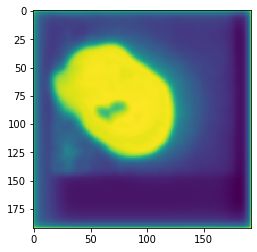

In [31]:
with torch.no_grad():
    plt.imshow (y_pred[0,0])
    print (y_pred[0,0].max())

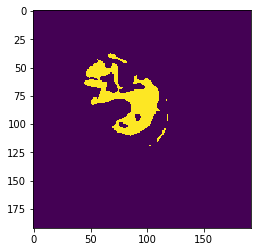

In [35]:
with torch.no_grad():
    y=nn.Sigmoid()(y_pred)
    y[y<0.2]=0
    y[y>=0.2]=1
    y=y.numpy().astype(np.uint8)
    plt.imshow (y[0,0])

tensor(1.)


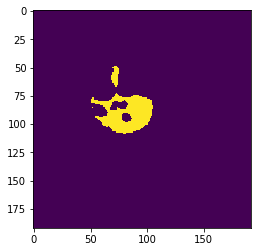

In [33]:
with torch.no_grad():
    plt.imshow (y_test[0,0])
    print (y_test[0,0].max())